# **Import Statements**

In [21]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from utils.experiment_manager import Experiment
from models.RNN_rect import EMG_RNN_Wrapper
from utils.data_management import Mat2TVT

%load_ext autoreload
%autoreload 2

torch.cuda.is_available()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


True

# **Data Reorganization** <br>


In [3]:
eye_bool = np.asarray([True, True, False, True, True, False, False, False])
electrode_list = ['u1', 'u2', 'u3', 'u4', 't2']
marker_list = ['u1', 'u2', 'u3', 'u4', 'u5']
filepath = 'eyeliddata.mat'

train = 0.7
val = 0.2
test = 0.1

reorganizer = Mat2TVT(eye_bool, electrode_list, marker_list, filepath)
_, _, identifier = reorganizer.load_data()
X, y = reorganizer.DMVC_norm()
TVT_dict = reorganizer.TVT_split(train, val, test)

# **Run Experiments**

In [22]:
params = {
    't_win': [0.3],
    't_stride': [10],
    't_lookahead': [50],
    'p_transform': [0.3],
    'sigma': [0.5],
    'p_mask': [0.2],
    'batch_size': [64],
    'learning_rate': [1e-3],
    'dropout': [0.4],
}

experiment = Experiment()
model = EMG_RNN_Wrapper()
best_params = experiment(params, TVT_dict, model, n_trials = 1)

print("Best Params:\n_________________________________________________________________________________________________________")
for key, value in best_params.items():
    print('    {}: {}'.format(key, value))

[I 2025-03-12 15:45:14,154] A new study created in memory with name: no-name-9337e21c-320b-494a-b4c6-e30c72d2a043


Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 8180.1%, Avg Marker Error: 173.6%, Avg loss: 1.283338 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 9904.7%, Avg Marker Error: 189.1%, Avg loss: 1.478963 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 7499.4%, Avg Marker Error: 167.7%, Avg loss: 1.246902 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 8963.2%, Avg Marker Error: 179.4%, Avg loss: 1.399702 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 7045.5%, Avg Marker Error: 162.9%, Avg loss: 1.218535 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 8196.5%, Avg Marker Error: 172.6%, Avg loss: 1.347797 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 7588.3%, Avg Marker Error: 167.3%, Avg loss: 1.308501 

Epoch 5
--------------

[I 2025-03-12 15:45:37,272] Trial 1 finished with value: 1.1795767545700073 and parameters: {'t_win': 0.3, 't_stride': 10, 't_lookahead': 50, 'p_transform': 0.3, 'sigma': 0.5, 'p_mask': 0.2, 'batch_size': 64, 'learning_rate': 0.001, 'dropout': 0.4}. Best is trial 1 with value: 1.1795767545700073.


Validation Error: 
 Max Marker Error: 5730.9%, Avg Marker Error: 146.3%, Avg loss: 1.179577 

Done!


[I 2025-03-12 15:45:37,663] Trial 0 finished with value: 1.1270503997802734 and parameters: {'t_win': 0.3, 't_stride': 10, 't_lookahead': 50, 'p_transform': 0.3, 'sigma': 0.5, 'p_mask': 0.2, 'batch_size': 64, 'learning_rate': 0.001, 'dropout': 0.4}. Best is trial 0 with value: 1.1270503997802734.


Validation Error: 
 Max Marker Error: 6334.3%, Avg Marker Error: 142.9%, Avg loss: 1.127050 

Done!
Best Params:
_________________________________________________________________________________________________________
    t_win: 0.3
    t_stride: 10
    t_lookahead: 50
    p_transform: 0.3
    sigma: 0.5
    p_mask: 0.2
    batch_size: 64
    learning_rate: 0.001
    dropout: 0.4


# **Training Model with Best Params**

In [23]:
metrics = experiment.run_experiment(best_params, TVT_dict, model, epochs = 20, patience = 5)


Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 7331.4%, Avg Marker Error: 199.6%, Avg loss: 1.437240 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 7125.7%, Avg Marker Error: 193.1%, Avg loss: 1.400561 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 7028.4%, Avg Marker Error: 186.3%, Avg loss: 1.345823 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 6899.8%, Avg Marker Error: 180.5%, Avg loss: 1.306094 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 6811.5%, Avg Marker Error: 175.7%, Avg loss: 1.275974 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 6725.7%, Avg Marker Error: 171.6%, Avg loss: 1.251230 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 6639.9%, Avg Marker Error: 168.1%, Avg loss: 1.235379 

Epoch 8
-------------------------------
Validation Error: 
 Ma

# **Plotting Loss Metrics**

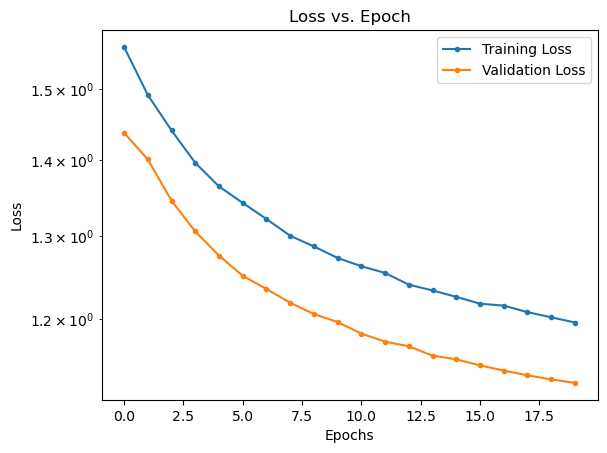

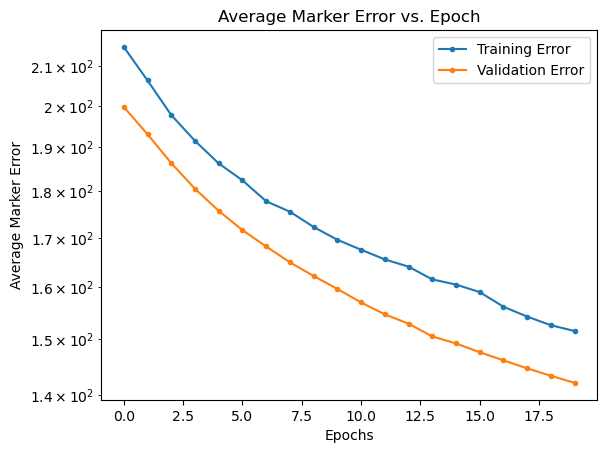

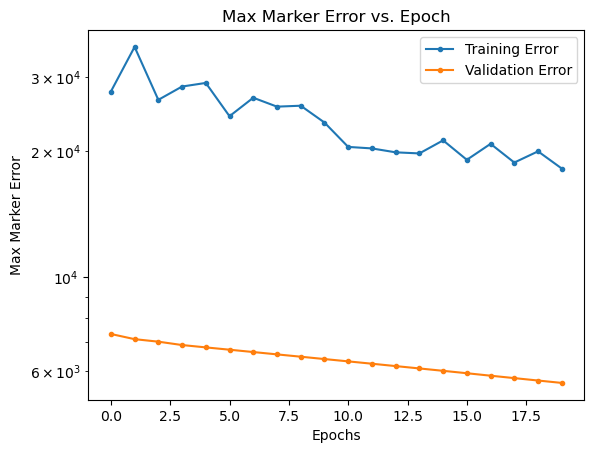

In [24]:
plt.plot(metrics['Training Loss'], label = 'Training Loss', marker = '.')
plt.plot(metrics['Validation Loss'], label = 'Validation Loss', marker = '.')
plt.yscale('log')
plt.title('Loss vs. Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(metrics['Training Avg Marker Error'], label = 'Training Error', marker = '.')
plt.plot(metrics['Validation Avg Marker Error'], label = 'Validation Error', marker = '.')
plt.yscale('log')
plt.title('Average Marker Error vs. Epoch')
plt.xlabel('Epochs')
plt.ylabel('Average Marker Error')
plt.legend()
plt.show()

plt.plot(metrics['Training Max Marker Error'], label = 'Training Error', marker = '.')
plt.plot(metrics['Validation Max Marker Error'], label = 'Validation Error', marker = '.')
plt.yscale('log')
plt.title('Max Marker Error vs. Epoch')
plt.xlabel('Epochs')
plt.ylabel('Max Marker Error')
plt.legend()
plt.show()